# Milestone 2 - Training Transformer Models with GloVe embeddings

### Imports

In [1]:
%cd ..
# imports
from scripts_m2 import *


c:\Users\001\OneDrive\Desktop\GUC\semester 10\nlp\NLP_PROJECT_111\QA Task milestone


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the begin

### 1. Get Dataloaders

In [2]:
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer_glove()

Filtered dataset size: 19900 out of original 20000
Filtered dataset size: 1986 out of original 2000


### 2. Model Training

#### Question [PAD] [SEP] Context [PAD]

In [3]:
print(tokenizer.get_pretrained_embeddings().shape)

torch.Size([400006, 300])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model = TransformerQAModel3(
    vocab_size=10_000,
    d_model=300,
    num_layers=4,
    num_heads=6,
    dim_feedforward=512,
    max_question_len=20,
    max_context_len=249,
    dropout=0.01,
    pretrained_embeddings=tokenizer.get_pretrained_embeddings(),
    freeze_embeddings=False,
)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=dev_dataloader,
    optimizer=optimizer,
    criterion=criterion,
    num_epochs=10,
    device=device,
    inputs = ["context_question", "attention_mask_context_question"],
    evaluate_val_dataset=True,
)


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/10:   0%|          | 0/622 [00:00<?, ?it/s]c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = sca

Epoch 1 Loss: 7.6752


Evaluating: 100%|██████████| 622/622 [00:43<00:00, 14.38it/s]


Training Loss: 6.6155
Training Metrics: {'start_accuracy': 0.1641206030150754, 'start_precision': 0.16559214540170503, 'start_recall': 0.1641206030150754, 'start_f1_score': 0.16132594275523873, 'end_accuracy': 0.171356783919598, 'end_precision': 0.1747481482298578, 'end_recall': 0.171356783919598, 'end_f1_score': 0.1691803254112028, 'joint_exact_match': 0.13467336683417086, 'span_overlap_f1': 0.14695445654072556}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.47it/s]


Validation Loss: 8.4002
Validation Metrics: {'start_accuracy': 0.09718026183282981, 'start_precision': 0.11898831141598541, 'start_recall': 0.09718026183282981, 'start_f1_score': 0.09438474808888687, 'end_accuracy': 0.09617321248741188, 'end_precision': 0.11081795723160802, 'end_recall': 0.09617321248741188, 'end_f1_score': 0.0947156435036993, 'joint_exact_match': 0.07150050352467271, 'span_overlap_f1': 0.08669758897191275}
Validation loss improved to 8.4002. Saving model state.
--------------------------------------------------


Epoch 2/10: 100%|██████████| 622/622 [01:06<00:00,  9.40it/s, loss=5.77]


Epoch 2 Loss: 6.4809


Evaluating: 100%|██████████| 622/622 [00:40<00:00, 15.30it/s]


Training Loss: 5.9621
Training Metrics: {'start_accuracy': 0.2178391959798995, 'start_precision': 0.21670068102358048, 'start_recall': 0.2178391959798995, 'start_f1_score': 0.21465968952873835, 'end_accuracy': 0.22301507537688442, 'end_precision': 0.2255572928019536, 'end_recall': 0.22301507537688442, 'end_f1_score': 0.22082259818246763, 'joint_exact_match': 0.18532663316582915, 'span_overlap_f1': 0.2020579828335672}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.21it/s]


Validation Loss: 8.2372
Validation Metrics: {'start_accuracy': 0.09113796576032225, 'start_precision': 0.10163873236996188, 'start_recall': 0.09113796576032225, 'start_f1_score': 0.08935587704322452, 'end_accuracy': 0.09969788519637462, 'end_precision': 0.10925037240112463, 'end_recall': 0.09969788519637462, 'end_f1_score': 0.09721856237636166, 'joint_exact_match': 0.07099697885196375, 'span_overlap_f1': 0.08864529047385149}
Validation loss improved to 8.2372. Saving model state.
--------------------------------------------------


Epoch 3/10: 100%|██████████| 622/622 [01:03<00:00,  9.72it/s, loss=9.27]


Epoch 3 Loss: 6.0957


Evaluating: 100%|██████████| 622/622 [00:39<00:00, 15.74it/s]


Training Loss: 8.7606
Training Metrics: {'start_accuracy': 0.01678391959798995, 'start_precision': 0.019665650728251455, 'start_recall': 0.01678391959798995, 'start_f1_score': 0.017414981134722552, 'end_accuracy': 0.014924623115577889, 'end_precision': 0.018302084450620846, 'end_recall': 0.014924623115577889, 'end_f1_score': 0.015695225862870296, 'joint_exact_match': 0.01, 'span_overlap_f1': 0.013488939208309349}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.35it/s]


Validation Loss: 9.2609
Validation Metrics: {'start_accuracy': 0.01460221550855992, 'start_precision': 0.01644973086848654, 'start_recall': 0.01460221550855992, 'start_f1_score': 0.014622266709871145, 'end_accuracy': 0.012084592145015106, 'end_precision': 0.014438813498999949, 'end_recall': 0.012084592145015106, 'end_f1_score': 0.012609277355992866, 'joint_exact_match': 0.008559919436052367, 'span_overlap_f1': 0.011670890901556244}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 4/10: 100%|██████████| 622/622 [01:04<00:00,  9.59it/s, loss=10.9]


Epoch 4 Loss: 10.9573


Evaluating: 100%|██████████| 622/622 [00:38<00:00, 16.10it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.055728643216080405, 'start_precision': 0.07454809918710627, 'start_recall': 0.055728643216080405, 'start_f1_score': 0.0602606444515502, 'end_accuracy': 0.05155778894472362, 'end_precision': 0.06971910856383136, 'end_recall': 0.05155778894472362, 'end_f1_score': 0.058343582807644505, 'joint_exact_match': 0.02321608040201005, 'span_overlap_f1': 0.03671962061130895}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.15it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.032225579053373615, 'start_precision': 0.041543659659450026, 'start_recall': 0.032225579053373615, 'start_f1_score': 0.029749795242735327, 'end_accuracy': 0.029707955689828803, 'end_precision': 0.03445707707920367, 'end_recall': 0.029707955689828803, 'end_f1_score': 0.03069325858713136, 'joint_exact_match': 0.011077542799597181, 'span_overlap_f1': 0.02562781260307603}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 5/10: 100%|██████████| 622/622 [01:05<00:00,  9.45it/s, loss=11]  


Epoch 5 Loss: 11.0396


Evaluating: 100%|██████████| 622/622 [00:38<00:00, 16.14it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.052613065326633165, 'start_precision': 0.07674816164703524, 'start_recall': 0.052613065326633165, 'start_f1_score': 0.057374491091849424, 'end_accuracy': 0.05633165829145729, 'end_precision': 0.0774764747196129, 'end_recall': 0.05633165829145729, 'end_f1_score': 0.06455023095398423, 'joint_exact_match': 0.024120603015075376, 'span_overlap_f1': 0.039009187863821695}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 17.67it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.039778449144008056, 'start_precision': 0.05722282019265688, 'start_recall': 0.039778449144008056, 'start_f1_score': 0.03814216082319086, 'end_accuracy': 0.03423967774420947, 'end_precision': 0.04593052987557673, 'end_recall': 0.03423967774420947, 'end_f1_score': 0.036945435405945186, 'joint_exact_match': 0.01460221550855992, 'span_overlap_f1': 0.03132403341222094}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 6/10: 100%|██████████| 622/622 [01:05<00:00,  9.47it/s, loss=11.1]


Epoch 6 Loss: 11.0383


Evaluating: 100%|██████████| 622/622 [00:38<00:00, 16.06it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.05150753768844221, 'start_precision': 0.07367917620467457, 'start_recall': 0.05150753768844221, 'start_f1_score': 0.056005343301516575, 'end_accuracy': 0.04758793969849246, 'end_precision': 0.0791950360942711, 'end_recall': 0.04758793969849246, 'end_f1_score': 0.058761403865325953, 'joint_exact_match': 0.021608040201005024, 'span_overlap_f1': 0.03460735915342874}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.24it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.03272910372608258, 'start_precision': 0.04338261057719145, 'start_recall': 0.03272910372608258, 'start_f1_score': 0.029311650034506243, 'end_accuracy': 0.02920443101711984, 'end_precision': 0.04733700380985162, 'end_recall': 0.02920443101711984, 'end_f1_score': 0.03438144742290269, 'joint_exact_match': 0.011077542799597181, 'span_overlap_f1': 0.024066299098487797}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 7/10: 100%|██████████| 622/622 [01:04<00:00,  9.59it/s, loss=11.1]


Epoch 7 Loss: 11.0370


Evaluating: 100%|██████████| 622/622 [00:38<00:00, 16.29it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.07175879396984924, 'start_precision': 0.08268472146645446, 'start_recall': 0.07175879396984924, 'start_f1_score': 0.074904378687262, 'end_accuracy': 0.04989949748743719, 'end_precision': 0.07856501537045972, 'end_recall': 0.04989949748743719, 'end_f1_score': 0.06031194839457181, 'joint_exact_match': 0.030653266331658293, 'span_overlap_f1': 0.03946282617710031}


Evaluating: 100%|██████████| 63/63 [00:03<00:00, 16.19it/s]

Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.04179254783484391, 'start_precision': 0.04708160051347164, 'start_recall': 0.04179254783484391, 'start_f1_score': 0.03965114775481537, 'end_accuracy': 0.029707955689828803, 'end_precision': 0.049651333573744676, 'end_recall': 0.029707955689828803, 'end_f1_score': 0.034843178006358846, 'joint_exact_match': 0.015609264853977844, 'span_overlap_f1': 0.024464712586470105}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


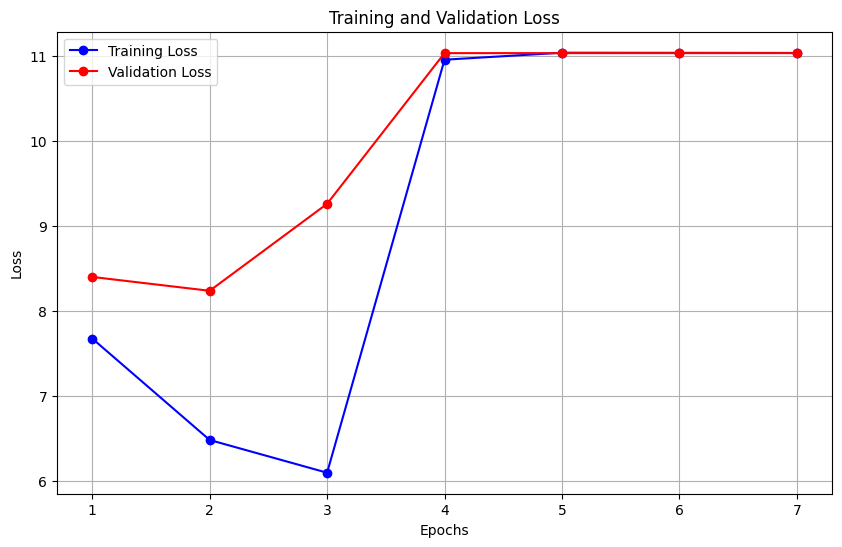

In [5]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

#### Save Model

In [6]:
model_path = "models/glove_qa_context_model_transformer.pkl"

In [7]:
save_model(model, model_path)

Model saved to models/glove_qa_context_model_transformer.pkl


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model(model_path=model_path)

Model loaded from models/glove_qa_context_model_transformer.pkl


#### Evaluation

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 622/622 [00:41<00:00, 15.11it/s]

Validation Loss: 5.9620
Validation Metrics: {'start_accuracy': 0.2178391959798995, 'start_precision': 0.21670068102358048, 'start_recall': 0.2178391959798995, 'start_f1_score': 0.21465968952873835, 'end_accuracy': 0.22301507537688442, 'end_precision': 0.2255572928019536, 'end_recall': 0.22301507537688442, 'end_f1_score': 0.22082259818246763, 'joint_exact_match': 0.18532663316582915, 'span_overlap_f1': 0.2020579828335672}


(5.962009769543958,
 {'start_accuracy': 0.2178391959798995,
  'start_precision': 0.21670068102358048,
  'start_recall': 0.2178391959798995,
  'start_f1_score': 0.21465968952873835,
  'end_accuracy': 0.22301507537688442,
  'end_precision': 0.2255572928019536,
  'end_recall': 0.22301507537688442,
  'end_f1_score': 0.22082259818246763,
  'joint_exact_match': 0.18532663316582915,
  'span_overlap_f1': 0.2020579828335672})

In [10]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.72it/s]

Validation Loss: 8.2372
Validation Metrics: {'start_accuracy': 0.09113796576032225, 'start_precision': 0.10163873236996188, 'start_recall': 0.09113796576032225, 'start_f1_score': 0.08935587704322452, 'end_accuracy': 0.09969788519637462, 'end_precision': 0.10925037240112463, 'end_recall': 0.09969788519637462, 'end_f1_score': 0.09721856237636166, 'joint_exact_match': 0.07099697885196375, 'span_overlap_f1': 0.08864529047385149}


(8.237185591743106,
 {'start_accuracy': 0.09113796576032225,
  'start_precision': 0.10163873236996188,
  'start_recall': 0.09113796576032225,
  'start_f1_score': 0.08935587704322452,
  'end_accuracy': 0.09969788519637462,
  'end_precision': 0.10925037240112463,
  'end_recall': 0.09969788519637462,
  'end_f1_score': 0.09721856237636166,
  'joint_exact_match': 0.07099697885196375,
  'span_overlap_f1': 0.08864529047385149})

##### Evaluate predictions on test set

In [14]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 63/63 [00:03<00:00, 15.75it/s]


In [15]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to mongols to fight against jin . two han chinese leaders , shi , liu ( , liu ni ) , and khitan xiao ( ) defected and commanded 3 tumens in mongol army . liu and shi served khan . liu and shi tianxiang led armies against western xia for mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . three khitan generals ( ) , ( ) and ( ) commanded three khitan tumens and four han generals zhang rou , yan shi , shi , and liu commanded four han tumens under khan .
Predicted Answer: 
True Answer: 3
--------------------------------------------------
Question: what is atomic number of element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of group on periodic table and is a highly reactive nonmetal and oxidizing agent that readily forms compounds ( notably oxides ) with most elements . by mass , oxygen is thir

##### Evaluate predictions on training set

In [16]:
train_preds, train_true_labels, train_contexts, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 622/622 [00:42<00:00, 14.77it/s]


In [17]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_contexts[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: buddha refused to pay respect to who , during their time of animal sacrifice ?
Context: a particular criticism of buddha was vedic animal sacrifice . he also mocked vedic hymn of cosmic man . however , buddha was not , and declared that veda in its true form was declared by kashyapa to certain rishis , who by severe penances had acquired power to see by divine eyes . he names vedic rishis , and declared that original veda of was altered by a few brahmins who introduced animal sacrifices . buddha says that it was on this alteration of true veda that he refused to pay respect to vedas of his time . however , he did not denounce union with brahman , or idea of self uniting with self . at same time , traditional hindu itself gradually underwent profound changes , transforming it into what is recognized as early hinduism .
Predicted Answer: vedas
True Answer: vedas
--------------------------------------------------
Question: in what year did henry cavendish recognize hydrogen gas 